  ## Tugas 4 Pemrosesan Citra Digital 
  ##### Nama : Muh. Yusuf Syam

  ##### NIM  : H071191044

In [ ]:
# Mengimpor package-package yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from PIL import Image
import sys
import imageio
import colorsys
import color
import edge
import mgcreate
%matplotlib inline

In [ ]:
# Membuat fungsi-fungsi pengubah format warna yang dibutuhkan
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

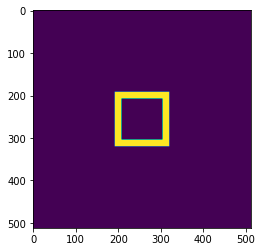

In [ ]:
# Nomor 1
# Membuat citra berbentuk square annulus dari fungsi SquareAnnulus()
img_1_ax = mgcreate.SquareAnnulus()
plt.imshow(img_1_ax)

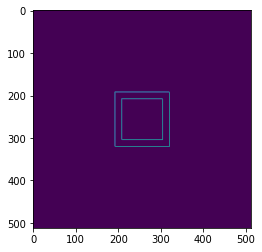

In [ ]:
# Menggeser gambar sebesar 1 pixel pada masing-masing sumbu x dan y
img_1_d = nd.shift(img_1_ax,(1,1))

# Melakukan operasi pengurangan agar menciptakan efek tepi
# Hasil operasi kemudian di-absolutkan
img_1_bx = np.abs(img_1_ax - img_1_d)
plt.imshow(img_1_bx)

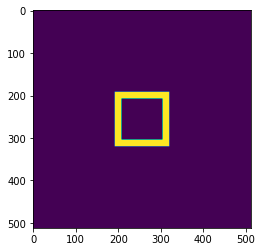

In [ ]:
# Nomor 2
# Membuat citra berbentuk square annulus dari fungsi SquareAnnulus()
img_2_ax = mgcreate.SquareAnnulus()
plt.imshow(img_2_ax)

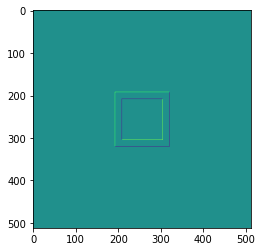

In [ ]:
# Menggeser gambar sebesar 1 pixel pada masing-masing sumbu x dan y
img_2_d = nd.shift(img_2_ax,(1,1))

# Melakukan operasi pengurangan agar menciptakan efek tepi
# Kali ini hasil operasi tidak di-absolutkan
img_2_bx = img_2_ax - img_2_d
plt.imshow(img_2_bx)

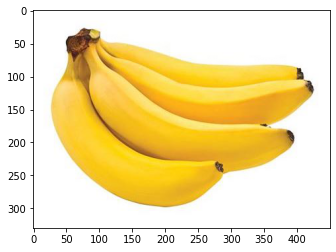

In [ ]:
# No. 3
# Mengimpor gambar
img_3_a = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_3_a)

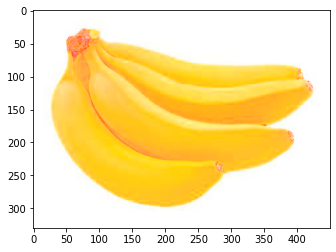

In [ ]:
# Konversi citra ke HSV
img_3_h, img_3_s, img_3_v = rgb_to_hsv(img_3_a[...,0], img_3_a[...,1], img_3_a[...,2])

# Menerapkan edge Operator pada citra yang hanya mengekstrak channel v 
img_3_bx = edge.Sobel(img_3_v)
# Citra yang hanya mengekstrak channel h
img_3_cx = img_3_h
# Citra yang hanya mengekstrak channel s
img_3_dx = img_3_s

#Membuat citra RGB dari HSV tetapi nilai channel ke 3 diset menjadi 1
img_3_r, img_3_g, img_3_b = hsv_to_rgb(img_3_cx, img_3_dx, np.full((img_3_a.shape[0], img_3_a.shape[1]), 1.0))
img_3_fx = np.dstack((img_3_r, img_3_g, img_3_b))
plt.imshow(img_3_fx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


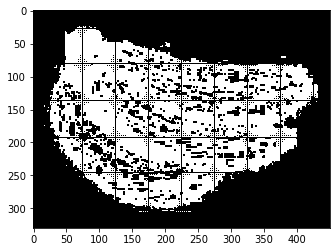

In [ ]:
# Melakukan operasi g[x]
alpha_3 = 0.5
img_3_temp1 = ((1-alpha_3)*img_3_bx)/img_3_bx.min()
citra_3_gx = (alpha_3*img_3_fx) + np.dstack((img_3_temp1,img_3_temp1,img_3_temp1))
plt.imshow(citra_3_gx)

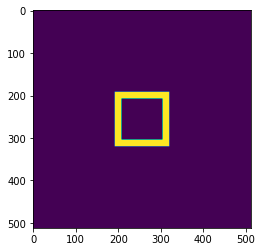

In [ ]:
# Nomor 4
# Membuat citra berbentuk square annulus dari fungsi SquareAnnulus()
img_4_ax = mgcreate.SquareAnnulus()
plt.imshow(img_4_ax)


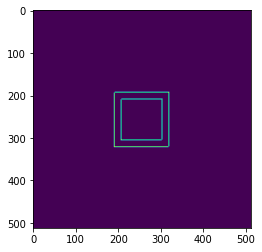

In [ ]:
# Menggeser gambar sebesar 2 pixel pada sumbu x 
# Dan -2 pixel pada sumbu y
img_4_d = nd.shift(img_4_ax,(2,-2))

# Melakukan operasi pengurangan agar menciptakan efek tepi
# Hasil operasi kemudian di-absolutkan
img_4_bx = np.abs(img_4_ax - img_4_d)
plt.imshow(img_4_bx)

Notasi Operator: $$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathcal{S_{m}}E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$



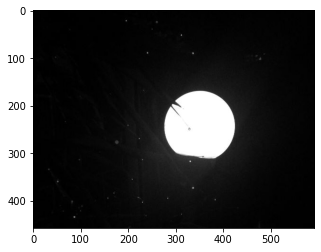

In [ ]:
# Nomor 5
# Memuat gambar dengan lalu mengubah ke greyscale
img_5_ax = imageio.imread('moon.jpg', as_gray=True)
plt.imshow(img_5_ax, cmap="gray")

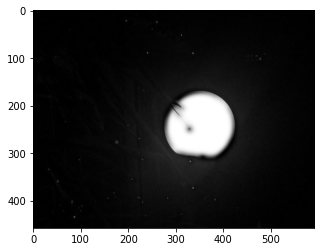

In [ ]:
# Melakukan operasi untuk mendapat tepi
img_5_d = abs(img_5_ax - nd.shift(img_5_ax,(1,1),order=0))

# Melakukan smooth terhadap tepi
img_5_filter = nd.gaussian_filter((img_5_d+0.0), sigma= 5)
img_5_mask = 1 - img_5_filter/img_5_filter.max()
# Mengalikan hasil smooth dengan citra awal
img_5_bx = img_5_ax*img_5_mask
plt.imshow(img_5_bx, cmap="gray")

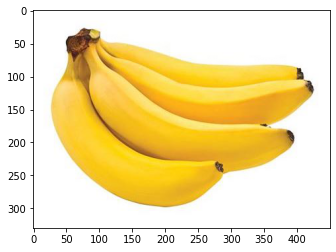

In [ ]:
# Nomor 6
# Mengimpor gambar
img_6_ax = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_6_ax)

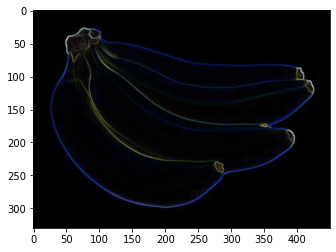

In [ ]:
# Nomor 6
# Mengimpor gambar
img_6_ax = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_6_ax)

# Citra untuk channel red
img_6_r = img_6_ax[...,0]
# Citra untuk channel Green
img_6_g = img_6_ax[...,1]
# Citra untuk channel Blue
img_6_b = img_6_ax[...,2]

# Lakukan Edge Sobel Filter ke masing-masing 3 citra r, g, b lalu gabung
img_6_bx = edge.Sobel(img_6_r)
img_6_cx = edge.Sobel(img_6_g)
img_6_dx = edge.Sobel(img_6_b)
img_6_fx = np.dstack((img_6_bx, img_6_cx, img_6_dx))

# Normalize citra
img_6_fx = img_6_fx/img_6_fx.max()
plt.imshow(img_6_fx)

Nomor 7

Nilai $\mathrm{\mathbf{b}}[\vec{x}]$ akan memiliki nilai piksel maksimum ketika $k \ge min(Za[\vec{x}])$ atau  $k \le -min(Za[\vec{x}])$ hal ini dikarenakan saat keadaan ini terjadi maka ketika pergeseran dilakukan oleh fungsi **DerivEdge** maka tidak pengurangan terhadap citra awal, sehingga maximum piksel dari citra yang dihasilkan akan tetap sama dengan citra awal.

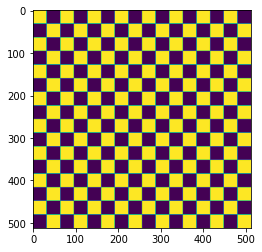

In [ ]:
#Nomor 8
img_8_ax = mgcreate.Checkerboard()
plt.imshow(img_8_ax)

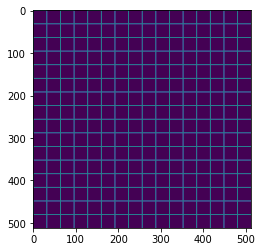

In [ ]:
# Menggeser gambar sebesar 1 pixel pada masing-masing sumbu x dan y
img_8_bx = edge.DerivEdge(img_8_ax, (1,1))
plt.imshow(img_8_bx)

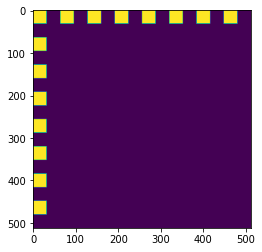

In [ ]:
# Menggeser gambar sebesar 32 pixel pada masing-masing sumbu x dan y
img_8_bx = edge.DerivEdge(img_8_ax, (32,32))
plt.imshow(img_8_bx)

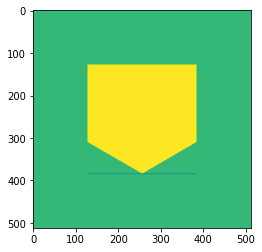

In [ ]:
# Nomor 9
# Membuat citra dengan fungsi Homeplate()
img_9_ax = mgcreate.Homeplate().astype('float64')
plt.imshow(img_9_ax)

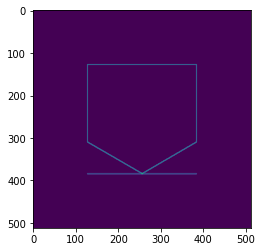

In [ ]:
# Menerapkan sobel filter terhadap citra
img_9_bx = edge.Sobel(img_9_ax)
plt.imshow(img_9_bx)

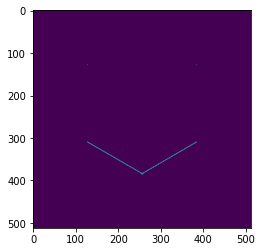

In [ ]:
# Menerapkan operasi threshold, hanya mengambil value yang > 5.5
img_9_cx = (img_9_bx > 5.5)
plt.imshow(img_9_cx)

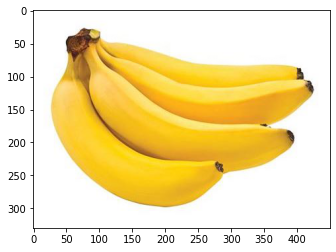

In [ ]:
# Nomor 10
# Mengimpor gambar
img_10 = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_10)

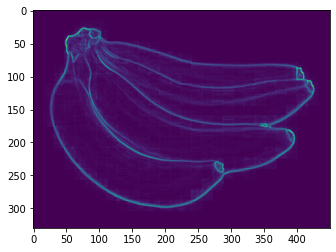

In [ ]:
# Merubah formatwarna citra dari RGB ke YUV
img_10_r, img_10_g, img_10_b = img_10[...,0], img_10[...,1], img_10[...,2]
img_10_y, img_10_u, img_10_v = color.RGB2YUV(img_10_r, img_10_g, img_10_b)

# Melakukan operasi Sobel Filter ke Semua Citra Channel YUV
# Kemudian menampungnya di 3 variabel baru, lalu jumlahkan
img_10_bx = edge.Sobel(img_10_y)
img_10_cx = edge.Sobel(img_10_u)
img_10_dx = edge.Sobel(img_10_v)
img_10_fx = img_10_bx + img_10_cx + img_10_dx

# Normalize
img_10_fx /= img_10_fx.max()
plt.imshow(img_10_fx)

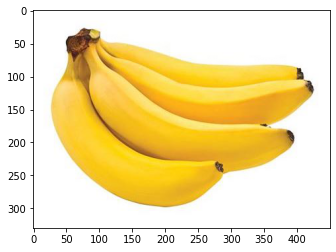

In [ ]:
# Nomor 11
# Mengimpor gambar
img_11 = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_11)

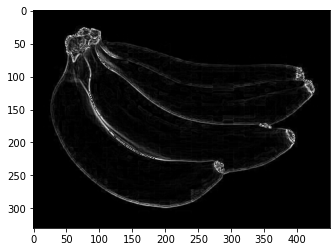

In [ ]:
# Mengubah format citra dari RGB ke HSV
img_11_h, img_11_s, img_11_v = rgb_to_hsv(img_11[...,0], img_11[...,1], img_11[...,2])

# Melakukan Filter Sobel hanya pada citra dengan channel v
img_11_bx = edge.Sobel(img_11_v)

# Menampung citra channel h dan s pada variabel cx dan dx
img_11_cx, img_11_dx = img_11_h, img_11_s

# Ubah citra ke RGB namun channel b diisi dengan himpunan kosong
img_11_r, img_11_g, img_11_b = hsv_to_rgb(img_11_cx, img_11_dx, np.zeros((img_11.shape[0], img_11.shape[1])))
img_11_fx = np.dstack((img_11_r, img_11_g, img_11_b))

# Melakukan operasi seperti di soal
alpha_11 = 0.5
img_11_temp1 = ((1-alpha_11)*img_11_bx)
img_11_gx = (alpha_11* img_11_fx) + np.dstack( ( img_11_temp1, img_11_temp1, img_11_temp1 ) )

plt.imshow((img_11_gx* 255).astype(np.uint8))

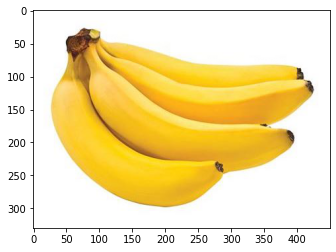

In [ ]:
# Nomor 12
# Mengimpor gambar
img_12_ax = imageio.imread('bananaa.jpg').astype('float64')/255
plt.imshow(img_12_ax)

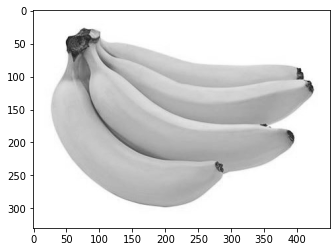

In [ ]:
# Merubah citra menjadi greyscale
img_12_gray = 0.5 *img_12_ax[:,:,0] + 0.75*img_12_ax[:,:,1] + 0.25*img_12_ax[:,:,2]
plt.imshow(img_12_gray, cmap="gray")

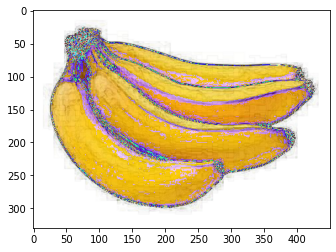

In [ ]:
# Melakukan Sobel Filter
img_12_temp1 = edge.Sobel(img_12_gray)
img_12_bx = img_12_ax -(np.dstack((img_12_temp1, img_12_temp1, img_12_temp1)))
plt.imshow((img_12_bx * 255).astype(np.uint8))